## **BigMart Sales Prediction**

## **Problem Statement**

**The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.**

### **Goal**

**Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.**

### **Libraries**

In [84]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings  # warning filter
import matplotlib.pyplot as plt # Data visulization
import seaborn as sns # Data visulization
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


In [2]:
sample_submission = pd.read_csv('sample_BM.csv')

## **Load the dataset**

In [3]:
# Reading Dataset Train.csv
train = pd.read_csv('/content/Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#Reading Dataset Test.csv
test = pd.read_csv('/content/Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
train.shape

(8523, 12)

In [ ]:
test.shape

(5681, 11)

# Exploratory Data Analysis

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
# Summary of Dataset Train
train.describe(include=[object, np.number]).transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Summary of Dataset Test
test.describe(include=[object, np.number]).transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,5681,1543,DRF48,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,4705.0,NaN,NaN,NaN,12.695633,4.664849,4.555,8.645,12.5,16.7,21.35
Item_Fat_Content,5681,5,Low Fat,3396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,5681.0,NaN,NaN,NaN,0.065684,0.051252,0.0,0.027047,0.054154,0.093463,0.323637
Item_Type,5681,16,Snack Foods,789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,5681.0,NaN,NaN,NaN,141.023273,61.809091,31.99,94.412,141.4154,186.0266,266.5884
Outlet_Identifier,5681,10,OUT027,624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,5681.0,NaN,NaN,NaN,1997.828903,8.372256,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,4075,3,Medium,1862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,5681,3,Tier 3,2233,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
null = pd.DataFrame({'Null Values' : train.isnull().sum().sort_values(ascending=False), 'Percentage Null Values' : train.isnull().sum().sort_values(ascending=False)/train.shape[0] * 100})
null

,Null Values,Percentage Null Values
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000


In [ ]:
null = pd.DataFrame({'Null Values' : test.isnull().sum().sort_values(ascending=False), 'Percentage Null Values' : test.isnull().sum().sort_values(ascending=False)/test.shape[0] * 100})
null

,Null Values,Percentage Null Values
Outlet_Size,1606,28.269671
Item_Weight,976,17.180074
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000


In [ ]:
# skewness of the numerical columns
num_columns = train.select_dtypes(include=['float64','int64'])
skewness = num_columns.apply(lambda x:x.skew())
print('Skewness of the numerical columns: \n',skewness)

Skewness of the numerical columns: 
 Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64


### **Data Visualization**

### Univariate Plots

Histograms, boxplots and countplots

Visualizing Quantitative Data Spread


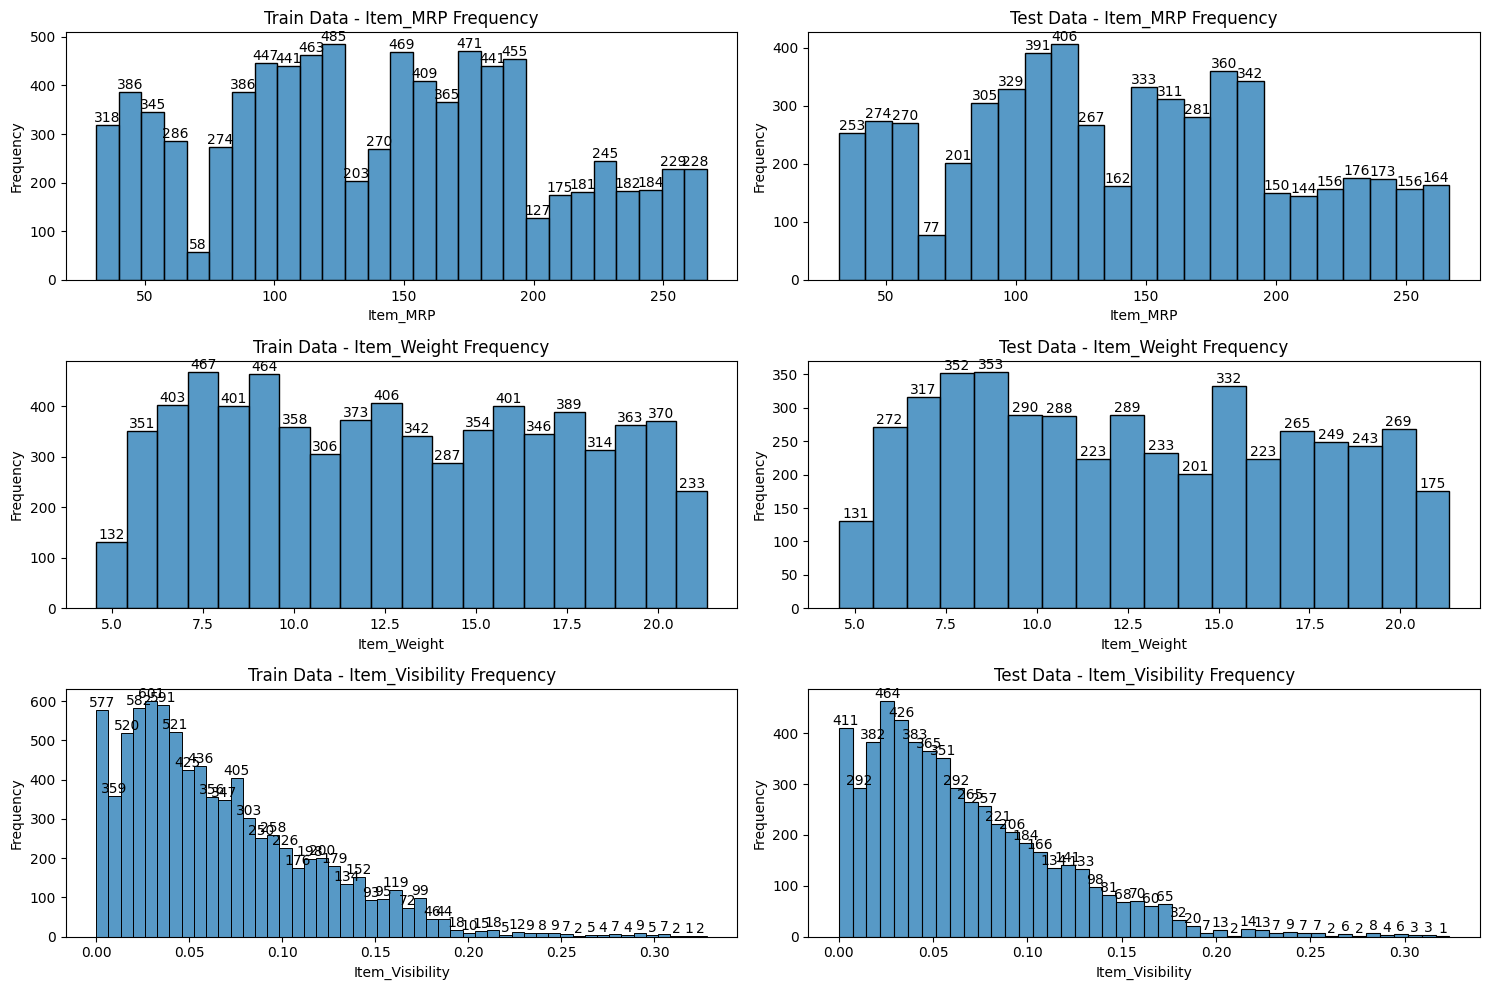

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
columns = ["Item_MRP", "Item_Weight", "Item_Visibility"]
print("Visualizing Quantitative Data Spread")
for i, label in enumerate(columns):
    row = i
    ax1 = sns.histplot(train[label], ax=axes[row, 0])
    ax1.set_xlabel(label)
    ax1.set_ylabel("Frequency")
    ax1.set_title(f"Train Data - {label} Frequency")
    for container in ax1.containers:
        ax1.bar_label(container, label_type="edge")
    ax2 = sns.histplot(test[label], ax=axes[row, 1])
    ax2.set_xlabel(label)
    ax2.set_ylabel("Frequency")
    ax2.set_title(f"Test Data - {label} Frequency")
    for container in ax2.containers:
        ax2.bar_label(container, label_type="edge")
plt.tight_layout()
plt.show()

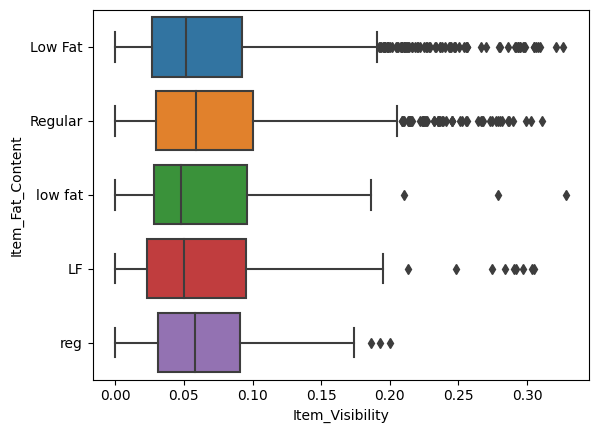

In [ ]:
# columns Item_Visibility and Item_Fat_Content
sns.boxplot(x = train['Item_Visibility'], y = train['Item_Fat_Content'])
plt.show()

Visualizing Discrete Data Spread


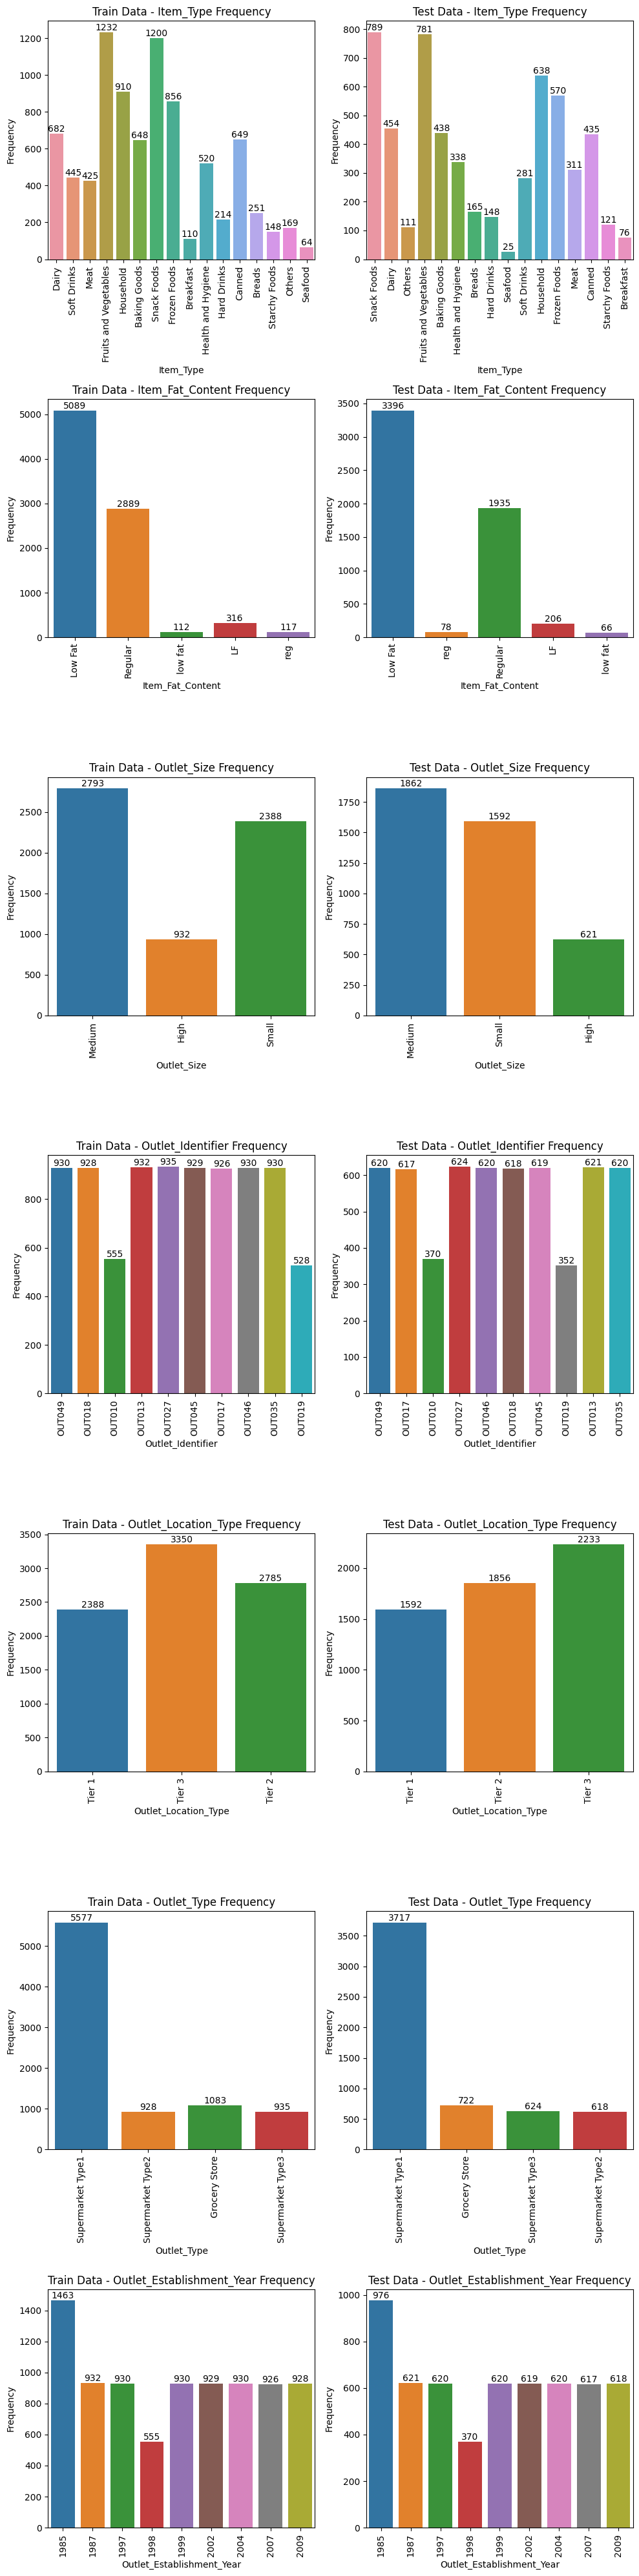

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(10, 40))
columns = ["Item_Type", "Item_Fat_Content", "Outlet_Size", "Outlet_Identifier",
           "Outlet_Location_Type", "Outlet_Type","Outlet_Establishment_Year"]
print("Visualizing Discrete Data Spread")
for i, label in enumerate(columns):
    row = i
    col1 = 0
    ax1 = sns.countplot(data=train, x=label, ax=axes[row, col1])
    ax1.set_xlabel(label)
    ax1.set_ylabel("Frequency")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    ax1.set_title(f"Train Data - {label} Frequency")
    for container in ax1.containers:
        ax1.bar_label(container, label_type="edge")
    col2 = 1
    ax2 = sns.countplot(data=test, x=label, ax=axes[row, col2])
    ax2.set_xlabel(label)
    ax2.set_ylabel("Frequency")
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
    ax2.set_title(f"Test Data - {label} Frequency")
    for container in ax2.containers:
        ax2.bar_label(container, label_type="edge")
plt.tight_layout()
plt.show()

1.   **Item_Type**: **Fruits $ Vegetable**s are popular in train and **snacks** **foods** are from test.
2.   **Item_Fat_Content**: Most items sold are **Low_Fat**.
1.   **Outlet_Size**: **Medium** stores are high.
2.   **Outlet_Location_Type**: Most comon type of location is **Tier3**
1.   **Outlet_Type**: Most Store Types are SuperMarket Type 1

## Bivariate plots

Bar graphs and scatter plots

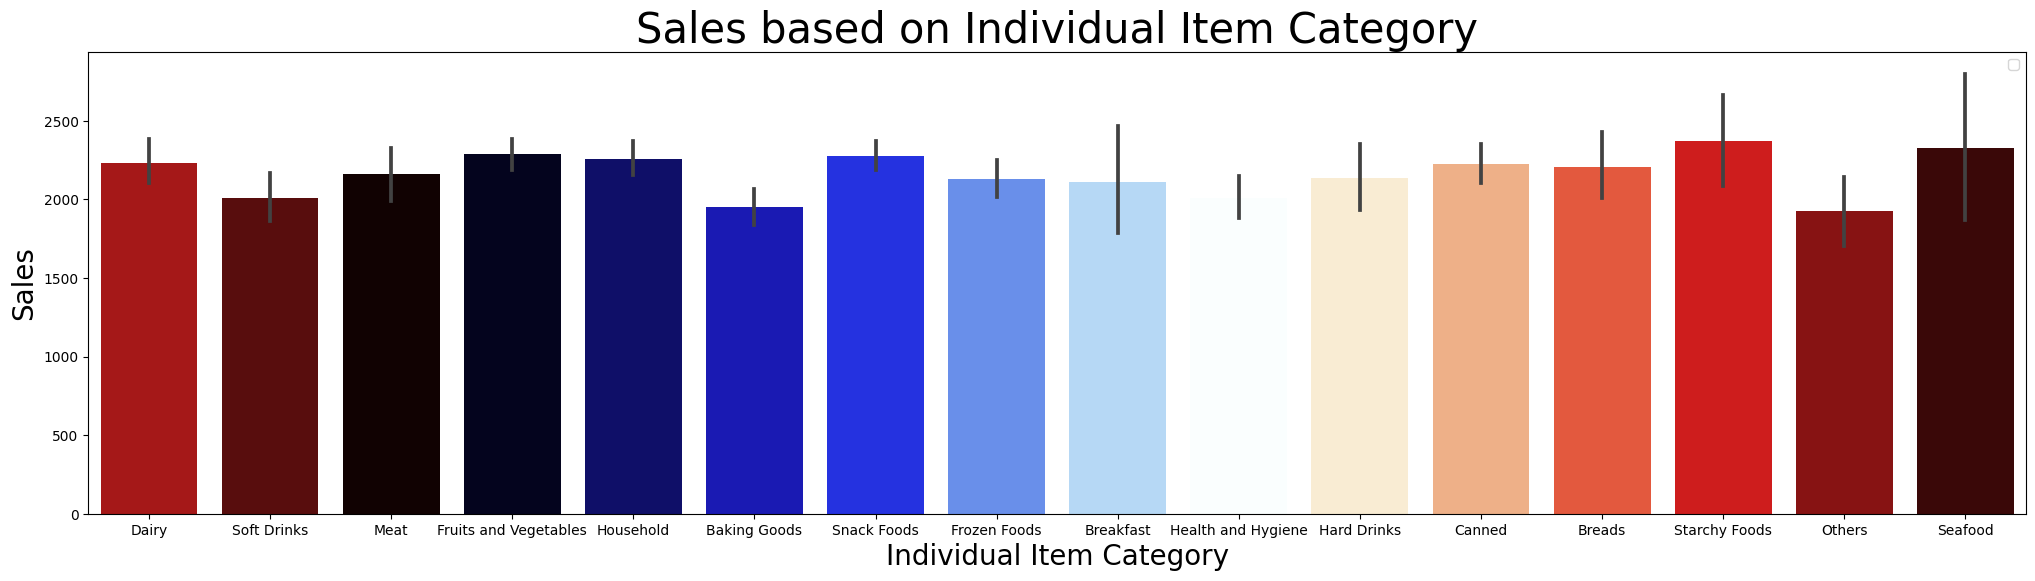

In [ ]:
# BarPlot for Sales per Item_Type
plt.figure(figsize=(25,6))
sns.barplot(data=train,x='Item_Type', y='Item_Outlet_Sales', palette='flag')
plt.title('Sales based on Individual Item Category', fontsize=30)
plt.xlabel('Individual Item Category', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.legend()
plt.show()

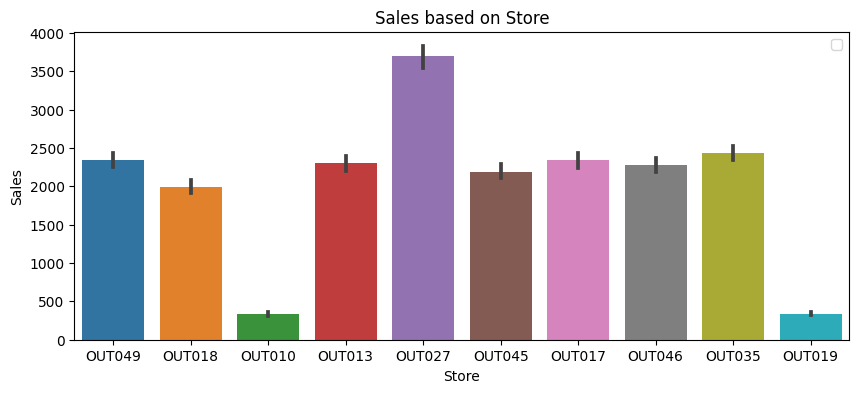

In [ ]:
# BarPlot for Sales per Outlet_Identifier
plt.figure(figsize=(10,4))
sns.barplot(data=train,x='Outlet_Identifier', y='Item_Outlet_Sales')
plt.title('Sales based on Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.legend()
plt.show()

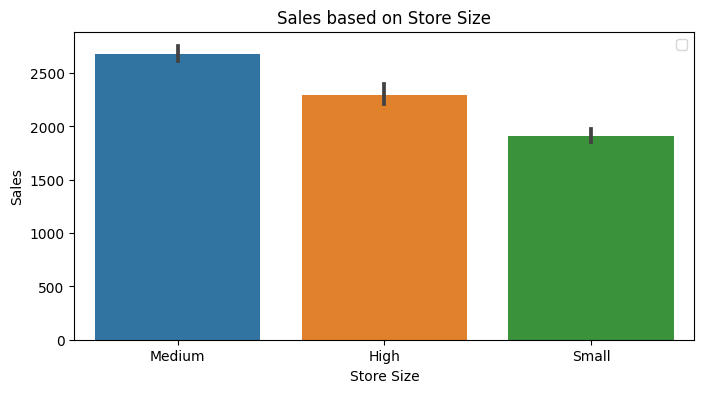

In [ ]:
# BarPlot for Sales per Outlet_Size
plt.figure(figsize=(8,4))
sns.barplot(data=train,x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales based on Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.legend()
plt.show()

Findings

1. **Item_Type**: **Seafood** has most sales,but difference is small.
2.  **Outlet_Identifier**: **Outlet027** has most profitable.
1.   **Outlet_Size**: Sales are mostly in **Medium** stores.





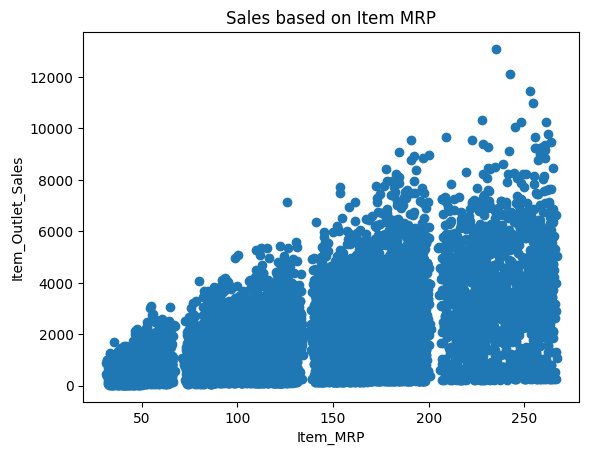

In [ ]:
# ScatterPlot for Sales per Item_MRP
plt.scatter(train['Item_MRP'], train['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

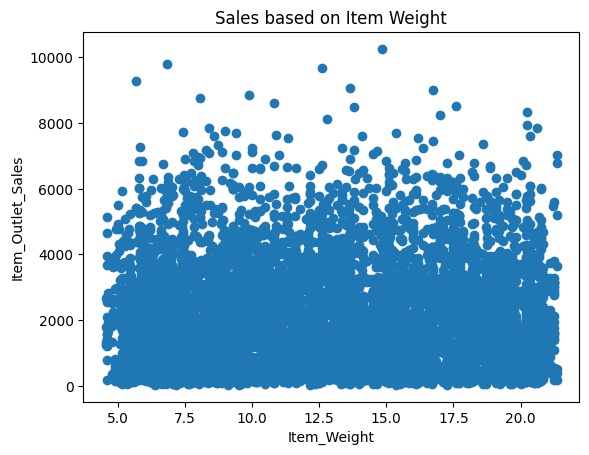

In [ ]:
# ScatterPlot for Sales per Item_Weight
plt.scatter(train['Item_Weight'], train['Item_Outlet_Sales'])
plt.title('Sales based on Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

Findings

1.  **Item_Weight**: Not a particular Pattern,Data is very spreaded.
2.  **Item_MRP**: Items with higer MRP Sales tends to sell better.

### Multivariate plots

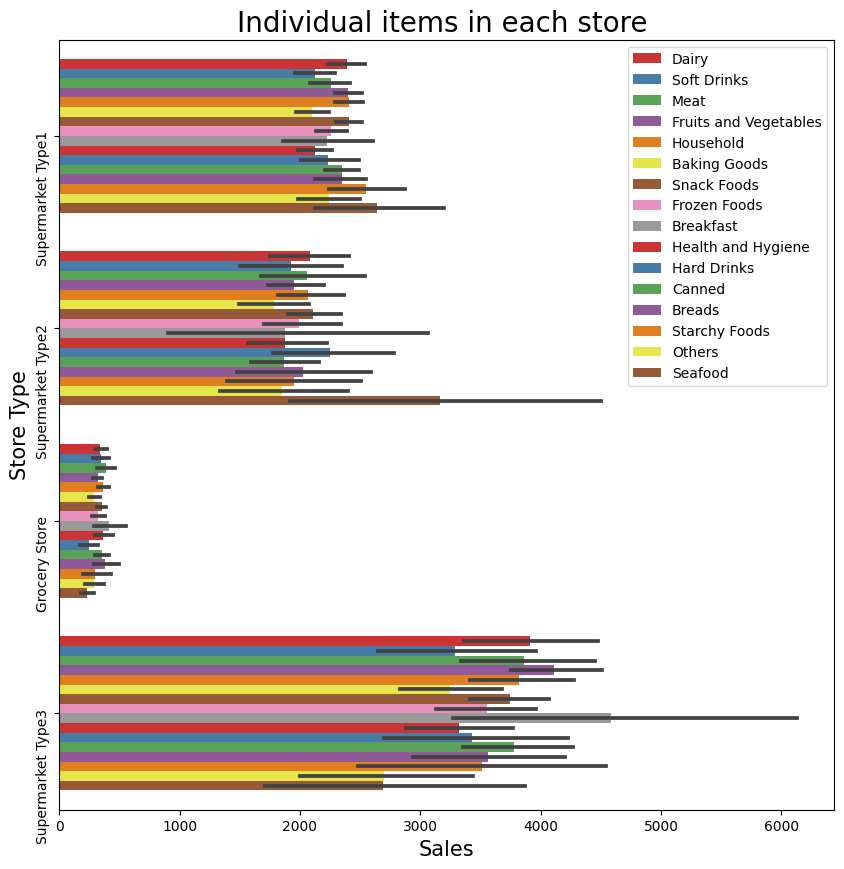

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=train,x='Item_Outlet_Sales', y='Outlet_Type',hue='Item_Type',palette='Set1')
plt.title('Individual items in each store ', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Store Type', fontsize=15)
plt.yticks(rotation=90)
plt.legend()
plt.show()

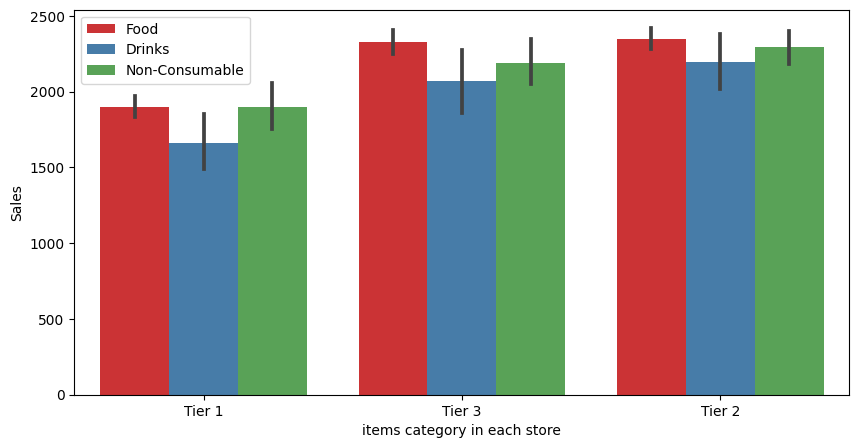

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=train,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Item_Type_Combined',palette='Set1')
plt.xlabel('items category in each store', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.legend()
plt.show()

Seafood is the most item_type sold in SuperMarket 1 and 2, Grocery store has less sales.
Tier 3 has most sales in each category



### Correlation Matrix

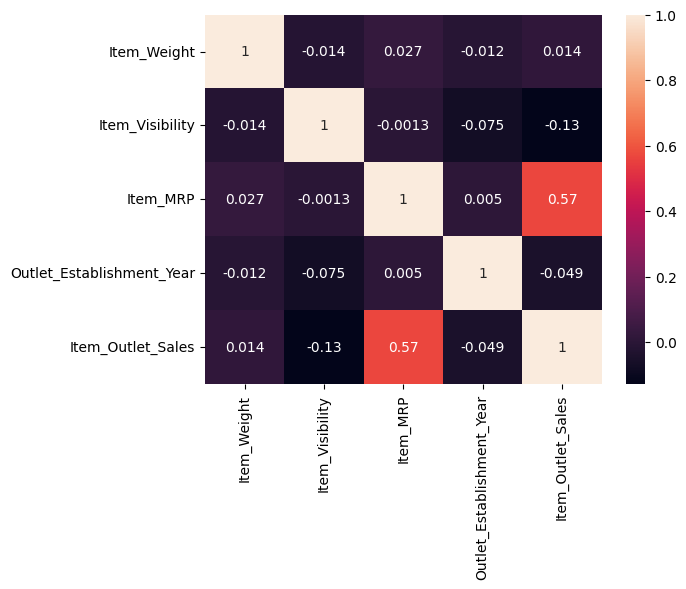

In [ ]:
# heatmap for the co-relation
sns.heatmap(num_columns.corr(),annot=True)
plt.show()


1. **Item_Outlet_Sales** is highly correlated with **Item_MRP**
2. **Outlet_Establishment_Yea**r and **Item_Visibility** are negativaly correlated  



### **Missing values treatment**

In [5]:
train['Item_Weight'].fillna(train['Item_Weight'].median(),inplace=True)

train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)


In [6]:
test['Item_Weight'].fillna(test['Item_Weight'].median(),inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)

In [7]:
#Replace reapted values in Item_Fat_Content
train['Item_Fat_Content'] = train.Item_Fat_Content.replace(['LF', 'low fat', 'reg'],
                                                              ['Low Fat','Low Fat', 'Regular'])

In [8]:
# Replace reapted values in Item_Fat_Content
test['Item_Fat_Content'] = test.Item_Fat_Content.replace(['LF', 'low fat', 'reg'],
                                                              ['Low Fat','Low Fat', 'Regular'])

In [9]:
train.loc[:, 'Item_Visibility'].replace([0], [train['Item_Visibility'].mean()], inplace=True)

In [10]:
test.loc[:, 'Item_Visibility'].replace([0], [test['Item_Visibility'].mean()], inplace=True)

In [11]:
train['Item_Type_Combined'] = train.Item_Identifier.apply(lambda x:x[0:2])

In [12]:
test['Item_Type_Combined'] = test.Item_Identifier.apply(lambda x:x[0:2])

In [13]:
train['Item_Type_Combined'] = train['Item_Type_Combined'].replace(['FD','DR','NC'],
                                                                   ['Food','Drinks', 'Non-Consumable'])
train.Item_Type_Combined.value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [14]:
test['Item_Type_Combined'] = test['Item_Type_Combined'].replace(['FD','DR','NC'],
                                                                   ['Food','Drinks', 'Non-Consumable'])
test.Item_Type_Combined.value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

In [15]:
# change Establishment_Year to Outlet_Age
train['Oultet_Age'] = 2013 - train['Outlet_Establishment_Year']

In [16]:
test['Oultet_Age'] = 2013 - test['Outlet_Establishment_Year']

### **Outlier treatment**

Text(0.5, 1.0, 'Item Weight')

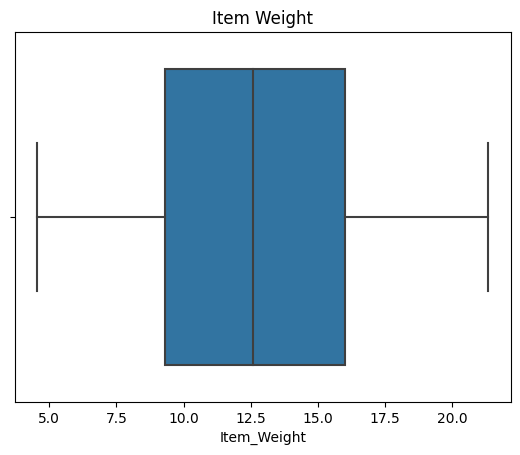

In [ ]:
#Box plot for Item_Outlet_Sales to see outliers
sns.boxplot(x=train['Item_Weight'])
plt.title('Item Weight')

Text(0.5, 1.0, 'Item Visibility')

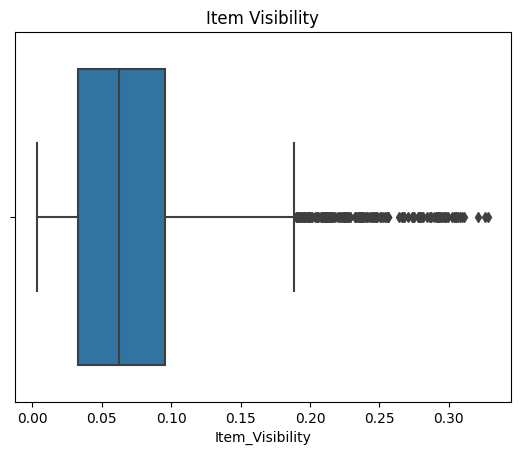

In [20]:
sns.boxplot(x=train['Item_Visibility'])
plt.title('Item Visibility')

In [21]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(train, "Item_Visibility")
print("Upper limit: ",upper)
print("Lower limit: ",lower)
train = train[(train['Item_Visibility'] > lower) & (train['Item_Visibility'] < upper)]

Upper limit:  0.1886238
Lower limit:  -0.06024273600000002


Text(0.5, 1.0, 'Item Visibility after removing outliers')

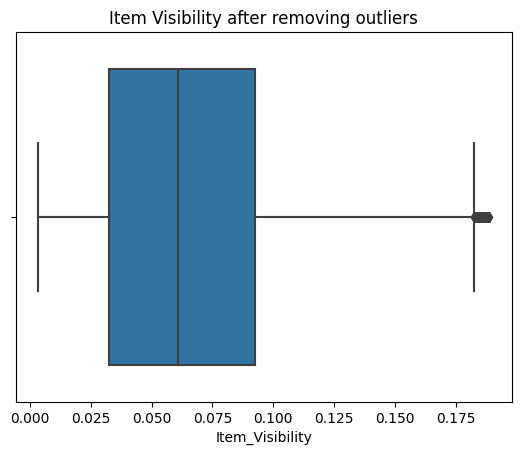

In [22]:
sns.boxplot(x=train['Item_Visibility'])
plt.title('Item Visibility after removing outliers')

Text(0.5, 1.0, 'Item_Outlet_Sales')

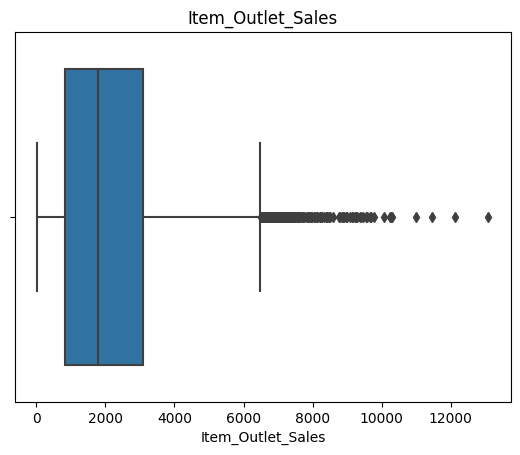

In [17]:
sns.boxplot(x=train['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales')

In [18]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(train, "Item_Outlet_Sales")
print("Upper limit: ",upper)
print("Lower limit: ",lower)
train = train[(train['Item_Outlet_Sales'] > lower) & (train['Item_Outlet_Sales'] < upper)]

Upper limit:  6501.8699
Lower limit:  -2566.3261


Text(0.5, 1.0, 'Item_Outlet_Sales')

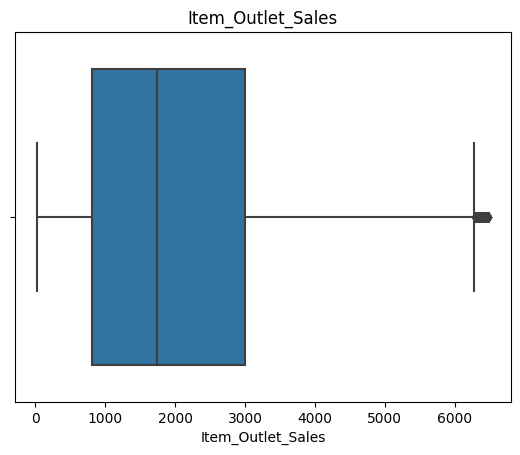

In [19]:
sns.boxplot(x=train['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales')

In [23]:
#Item_Fat_Content'
train['Item_Fat_Content'].value_counts()

Low Fat    5299
Regular    2877
Name: Item_Fat_Content, dtype: int64

In [ ]:
# chi-square test to check the co-relation

In [24]:
train['Outlet_Size'].value_counts()

Medium    4981
Small     2278
High       917
Name: Outlet_Size, dtype: int64

In [25]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3152
Tier 2    2741
Tier 1    2283
Name: Outlet_Location_Type, dtype: int64

In [26]:
pd.crosstab(index=train['Outlet_Size'], columns=train['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,917
Medium,919,1827,2235
Small,1364,914,0


# Hypothesis Testing

In [27]:
# import chi2 contingency
from scipy.stats import chi2_contingency

In [28]:
#  define a function for chi square test
def chi_sq_test(var1, var2):
  cont_table = pd.crosstab(var1, var2)
  _,p,_,_ = chi2_contingency(cont_table)
  if p < 0.05:
    print('Accept the Alternate Hypothesis (There is a realation between var1 and var2)', round(p, 2))
  else:
    print('Failed to Reject Null Hypothesis (There is no relation between var1 and var2)', round(p, 2))
  return cont_table

In [29]:
chi_sq_test(train['Outlet_Size'], train['Outlet_Location_Type'])

Accept the Alternate Hypothesis (There is a realation between var1 and var2) 0.0


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,917
Medium,919,1827,2235
Small,1364,914,0


In [30]:
chi_sq_test(train['Item_Fat_Content'], train['Item_Type'])

Accept the Alternate Hypothesis (There is a realation between var1 and var2) 0.0


Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,,,,
Low Fat,318,136,35,324,400,437,601,207,505,877,164,166,36,656,359,78
Regular,302,105,66,302,247,391,572,0,0,0,245,0,24,496,66,61


### **Feature Engineering**

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8176 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8176 non-null   object 
 1   Item_Weight                8176 non-null   float64
 2   Item_Fat_Content           8176 non-null   object 
 3   Item_Visibility            8176 non-null   float64
 4   Item_Type                  8176 non-null   object 
 5   Item_MRP                   8176 non-null   float64
 6   Outlet_Identifier          8176 non-null   object 
 7   Outlet_Establishment_Year  8176 non-null   int64  
 8   Outlet_Size                8176 non-null   object 
 9   Outlet_Location_Type       8176 non-null   object 
 10  Outlet_Type                8176 non-null   object 
 11  Item_Outlet_Sales          8176 non-null   float64
 12  Item_Type_Combined         8176 non-null   object 
 13  Oultet_Age                 8176 non-null   int64

In [32]:
train.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year','Oultet_Age'], inplace = True, axis = 1)

In [33]:
test.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year','Oultet_Age'], inplace = True, axis = 1)

In [34]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Type_Combined'],
      dtype='object')

In [35]:
test.shape

(5681, 9)

In [36]:
test.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Type_Combined'],
      dtype='object')

### **Label Encoding**

In [37]:
le = LabelEncoder()
label = ['Item_Type_Combined']
for i in label:
    train[i] = le.fit_transform(train[i])
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,0
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,1
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,1
4,8.93,Low Fat,0.066132,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,2


In [38]:
le = LabelEncoder()
label = ['Item_Type_Combined']
for i in label:
    test[i] = le.fit_transform(test[i])
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1,1
1,8.300,Regular,0.038428,Dairy,87.3198,Medium,Tier 2,Supermarket Type1,1
2,14.600,Low Fat,0.099575,Others,241.7538,Medium,Tier 3,Grocery Store,2
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,Medium,Tier 2,Supermarket Type1,1
4,12.500,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3,1


In [39]:
train = pd.get_dummies(train,columns=['Item_Fat_Content', 'Item_Type','Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size'])

In [40]:
test = pd.get_dummies(test,columns=['Item_Fat_Content', 'Item_Type','Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size'])

In [41]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Type_Combined,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,9.30,0.016047,249.8092,3735.1380,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,443.4228,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,17.50,0.016760,141.6180,2097.2700,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,19.20,0.066132,182.0950,732.3800,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,8.93,0.066132,53.8614,994.7052,2,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [42]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Type_Combined,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,20.750,0.007565,107.8622,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,8.300,0.038428,87.3198,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,14.600,0.099575,241.7538,2,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,7.315,0.015388,155.0340,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,12.500,0.118599,234.2300,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [43]:
cols = ['Item_Weight','Item_Visibility','Item_MRP']

In [44]:
#scaling  data
std = StandardScaler()
for col in cols:
    train[col] = std.fit_transform(train[col].values.reshape(-1, 1))

In [45]:
#scaling  data
std = StandardScaler()
for col in cols:
    test[col] = std.fit_transform(test[col].values.reshape(-1, 1))

In [46]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Type_Combined,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,-0.825477,-1.187786,1.798105,3735.1380,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,-1.617216,-1.112607,-1.476676,443.4228,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,1.095310,-1.171201,0.040129,2097.2700,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,1.493521,-0.022379,0.697831,732.3800,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,-0.912147,-0.022379,-1.385809,994.7052,2,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [47]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Type_Combined,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,1.905090,-1.285395,-0.536555,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,-1.027457,-0.647603,-0.868937,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.456482,0.616028,1.629848,2,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,-1.259469,-1.123718,0.226697,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,-0.038164,1.009174,1.508110,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


# Data Modelling

In [48]:
y = train['Item_Outlet_Sales']
x = train.drop(['Item_Outlet_Sales'], axis = 1)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 15)

# Linear Regression

In [50]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_train = lr.predict(x_train)
lr_test = lr.predict(x_test)

In [51]:
# Model Evaluation
def model_eval(actual, predicted):
  rmse = np.sqrt(MSE(actual, predicted))
  r2 = R2(actual, predicted)
  print('The RMSE value for the model is: ', round(rmse,2))
  print('The R2 Score for the model is: ', round(r2, 2))

In [52]:
# Cross Validation Score after model completion
def cross_val(model, X, y, cv):
    scores = CVS(model, X, y, cv=cv)
    print(f'{model} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model} score: {round(scores.mean(),4)}')

In [53]:
model_eval(y_train, lr_train)

The RMSE value for the model is:  1012.76
The R2 Score for the model is:  0.55


In [54]:
model_eval(y_test, lr_test)


The RMSE value for the model is:  993.98
The R2 Score for the model is:  0.55


In [55]:
cross_val(LinearRegression(),x,y,5)

LinearRegression() Scores:
0.55
0.54
0.53
0.55
0.55
Average LinearRegression() score: 0.5439


In [56]:
y_predict=lr.predict(pd.DataFrame(test))

In [57]:
print(pd.DataFrame(y_predict))


                0
0     1738.424160
1     1446.965585
2     1734.555371
3     2402.491442
4     4564.485252
...           ...
5676  2265.355408
5677  2401.822499
5678  1890.049011
5679  3334.594133
5680  1420.021353

[5681 rows x 1 columns]


# Lasso Regression

In [58]:
#model
ls = Lasso(alpha=0.05)
# Fit
ls.fit(x_train, y_train)
# Predict
y_predict_lasso = ls.predict(x_test)

In [59]:
model_eval(y_test, y_predict_lasso)

The RMSE value for the model is:  993.95
The R2 Score for the model is:  0.55


In [60]:
cross_val(Lasso(alpha=0.05),x,y,5)

Lasso(alpha=0.05) Scores:
0.55
0.54
0.53
0.55
0.55
Average Lasso(alpha=0.05) score: 0.544


In [61]:
y_predict=ls.predict(pd.DataFrame(test))
print(pd.DataFrame(y_predict))


                0
0     1739.829648
1     1452.310384
2     1732.733202
3     2403.276793
4     4568.806878
...           ...
5676  2265.131503
5677  2398.550622
5678  1889.067978
5679  3332.913747
5680  1418.726527

[5681 rows x 1 columns]


# Ridge Regression

In [62]:
#model
rr = Ridge()
# Fit
rr.fit(x_train, y_train)
# Predict
y_predict_ridge = rr.predict(x_test)

In [63]:
model_eval(y_test, y_predict_ridge)

The RMSE value for the model is:  993.95
The R2 Score for the model is:  0.55


In [64]:
cross_val(Ridge(),x,y,5)

Ridge() Scores:
0.55
0.54
0.53
0.55
0.55
Average Ridge() score: 0.544


In [65]:
y_predict=rr.predict(pd.DataFrame(test))
print(pd.DataFrame(y_predict))

                0
0     1738.780347
1     1448.261681
2     1737.386399
3     2402.767997
4     4562.812148
...           ...
5676  2265.270198
5677  2401.051854
5678  1890.018753
5679  3334.253604
5680  1420.030231

[5681 rows x 1 columns]


# Random Forest Regressor

In [66]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [67]:
rf_preds_train = rf.predict(x_train)
rf_preds_test = rf.predict(x_test)

In [68]:
model_eval(y_train, rf_preds_train)


The RMSE value for the model is:  392.55
The R2 Score for the model is:  0.93


In [69]:
model_eval(y_test, rf_preds_test)


The RMSE value for the model is:  1037.53
The R2 Score for the model is:  0.51


In [70]:
cross_val(RandomForestRegressor(),x, y, 5)

RandomForestRegressor() Scores:
0.52
0.51
0.48
0.52
0.53
Average RandomForestRegressor() score: 0.5111


In [71]:
y_predict_random=rf.predict(pd.DataFrame(test))
print(pd.DataFrame(y_predict_random))

                0
0     1738.996362
1     1387.587122
2      832.016970
3     2491.017462
4     3461.294460
...           ...
5676  2009.590798
5677  2724.999556
5678  1907.983060
5679  3462.626060
5680  1621.302896

[5681 rows x 1 columns]


# Ada Boost Regressor

In [72]:
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
preds_ada_train = ada.predict(x_train)
preds_ada_test = ada.predict(x_test)

In [73]:
model_eval(y_train, preds_ada_train)


The RMSE value for the model is:  1018.37
The R2 Score for the model is:  0.54


In [74]:
model_eval(y_test, preds_ada_test)


The RMSE value for the model is:  1004.29
The R2 Score for the model is:  0.54


In [75]:
cross_val(AdaBoostRegressor(),x, y, 5)

AdaBoostRegressor() Scores:
0.54
0.54
0.53
0.55
0.55
Average AdaBoostRegressor() score: 0.5427


In [76]:
y_predict_random=ada.predict(pd.DataFrame(test))
print(pd.DataFrame(y_predict_random))

                0
0     1783.559787
1     1433.332960
2      607.892256
3     2998.338461
4     4218.391439
...           ...
5676  1886.605837
5677  3176.190712
5678  1886.605837
5679  3305.485984
5680   945.565025

[5681 rows x 1 columns]


# Gradient Boosting Regressor

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
preds_gb_train = gb.predict(x_train)
preds_gb_test = gb.predict(x_test)

In [79]:
model_eval(y_train, preds_gb_train)


The RMSE value for the model is:  935.43
The R2 Score for the model is:  0.62


In [80]:
model_eval(y_test,preds_gb_test )


The RMSE value for the model is:  963.79
The R2 Score for the model is:  0.58


In [81]:
cross_val(GradientBoostingRegressor(),x, y, 5)

GradientBoostingRegressor() Scores:
0.57
0.57
0.56
0.58
0.58
Average GradientBoostingRegressor() score: 0.5725


In [82]:
y_predict_random=gb.predict(pd.DataFrame(test))
print(pd.DataFrame(y_predict_random))

                0
0     1519.419931
1     1298.155026
2      611.954009
3     2441.364622
4     4543.201396
...           ...
5676  2073.025477
5677  2527.338693
5678  1820.724963
5679  3471.969955
5680  1244.880071

[5681 rows x 1 columns]


# XG Boost Regressor

In [86]:
import xgboost as xg
xgb = xg.XGBRegressor()
xgb.fit(x_train, y_train)
preds_xgb_train = xgb.predict(x_train)
preds_xgb_test = xgb.predict(x_test)

In [87]:
model_eval(y_train, preds_xgb_train)


The RMSE value for the model is:  590.95
The R2 Score for the model is:  0.85


In [88]:
model_eval(y_test, preds_xgb_test)


The RMSE value for the model is:  1073.14
The R2 Score for the model is:  0.47


In [89]:
cross_val(xg.XGBRegressor(),x, y, 5)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) Scores:
0.5
0.47
0.44
0.49
0.49
Average XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             ena

In [90]:
y_predict_random=xgb.predict(pd.DataFrame(test))
print(pd.DataFrame(y_predict_random))

                0
0      990.784546
1     1282.826416
2      706.941772
3     2469.341064
4     4091.216309
...           ...
5676  2346.825684
5677  2507.871094
5678  1871.951050
5679  4195.841309
5680  1014.114502

[5681 rows x 1 columns]


# SGD Regressor

In [92]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(x_train, y_train)
preds_train_sgd = sgd.predict(x_train)
preds_test_sgd = sgd.predict(x_test)

In [93]:
model_eval(y_train,preds_train_sgd )


The RMSE value for the model is:  1014.11
The R2 Score for the model is:  0.55


In [94]:
model_eval(y_test, preds_test_sgd)


The RMSE value for the model is:  993.2
The R2 Score for the model is:  0.55


In [95]:
cross_val(SGDRegressor(),x, y, 5)

SGDRegressor() Scores:
0.55
0.54
0.53
0.55
0.55
Average SGDRegressor() score: 0.543


# Hypertuning

hypertune our model and see if we can further improve the RMSE and R2 Score

**Hypertune Gradient Boosting Regressor using RandomizedSearchCV as it has the highest R2 score among the model.**

In [96]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
# Number of estimators
n_estimators = [int(x) for x in np.linspace(start=50, stop=300, num=10)]

# Number of features to consider at every split
max_features = ['log2', 'sqrt']

# Maximum number of levels
max_depth = [int(x) for x in np.linspace(3, 15, num=5)] + [None]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Learning Rate
l_rate = [0.01, 0.05, 0.1, 0.5]

In [98]:
# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'learning_rate': l_rate
}

In [99]:
# Randomized Search CV setup
gb_clf = RandomizedSearchCV(estimator=gb, param_distributions=random_grid, n_iter=100, cv=3, random_state=123, n_jobs=-1)

In [100]:
#fit the Randomized Search CV to our data
gb_clf.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'max_depth': [3, 6, 9, 12, 15, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 77, 105, 133, 161,
                                                         188, 216, 244, 272,
                                                         300]},
                   random_state=123)

In [101]:
# best parameters and best score
print("Best Parameters:", gb_clf.best_params_)
print("Best Score:", gb_clf.best_score_)

Best Parameters: {'n_estimators': 216, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.05}
Best Score: 0.5657527819246769


In [102]:
gb2 = GradientBoostingRegressor(n_estimators=244,min_samples_split= 10,min_samples_leaf= 2,
                                max_features='log2',max_depth= 3,learning_rate= 0.05)
gb2.fit(x_train, y_train)
preds_gb2_train = gb2.predict(x_train)
preds_gb2_test = gb2.predict(x_test)

In [103]:
model_eval(y_train, preds_gb2_train)


The RMSE value for the model is:  954.04
The R2 Score for the model is:  0.6


In [104]:
model_eval(y_test,preds_gb2_test )


The RMSE value for the model is:  972.61
The R2 Score for the model is:  0.57


# Test Data

In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   float64
 1   Item_Visibility                  5681 non-null   float64
 2   Item_MRP                         5681 non-null   float64
 3   Item_Type_Combined               5681 non-null   int64  
 4   Item_Fat_Content_Low Fat         5681 non-null   uint8  
 5   Item_Fat_Content_Regular         5681 non-null   uint8  
 6   Item_Type_Baking Goods           5681 non-null   uint8  
 7   Item_Type_Breads                 5681 non-null   uint8  
 8   Item_Type_Breakfast              5681 non-null   uint8  
 9   Item_Type_Canned                 5681 non-null   uint8  
 10  Item_Type_Dairy                  5681 non-null   uint8  
 11  Item_Type_Frozen Foods           5681 non-null   uint8  
 12  Item_Type_Fruits and

In [106]:
test['Item_Outlet_Sales'] = gb2.predict(test)


In [107]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Type_Combined,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Outlet_Sales
0,1.905090,-1.285395,-0.536555,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1533.012073
1,-1.027457,-0.647603,-0.868937,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1332.314757
2,0.456482,0.616028,1.629848,2,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1150.685783
3,-1.259469,-1.123718,0.226697,1,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,2408.558896
4,-0.038164,1.009174,1.508110,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,4408.090755


In [108]:
test['Item_Outlet_Sales'] = abs(test['Item_Outlet_Sales'])


In [109]:
sample_submission['Item_Outlet_Sales'] = test['Item_Outlet_Sales']


In [110]:
sample_submission.head()


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1533.012073
1,FDW14,OUT017,1332.314757
2,NCN55,OUT010,1150.685783
3,FDQ58,OUT017,2408.558896
4,FDY38,OUT027,4408.090755


In [111]:
sample_submission.to_csv('Sales_prediction.csv', index = False)


In [112]:
import pickle


In [113]:
filename = 'finalized_model.sav'
pickle.dump(gb, open(filename, 'wb'))

### **Conclusion**

**Gradient Boosting Regressor gives the best R2 score for the model.**